Notebook is taken from https://github.com/woctezuma/stable-diffusion-colab 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pip install --quiet --upgrade diffusers transformers accelerate mediapy triton scipy ftfy spacy==3.4.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 KB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 103.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 KB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.7 MB/s eta 0:00:00


In [ ]:
# The xformers package is mandatory to be able to create several 768x768 images.
%pip install -q xformers==0.0.16rc425

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 MB 18.3 MB/s eta 0:00:00


In [ ]:
model_id = "stabilityai/stable-diffusion-2-1-base"
# model_id = "stabilityai/stable-diffusion-2-1"
#model_id = "dreamlike-art/dreamlike-photoreal-2.0"

In [ ]:
from diffusers import PNDMScheduler, DDIMScheduler, LMSDiscreteScheduler, EulerDiscreteScheduler, DPMSolverMultistepScheduler

scheduler = None
# scheduler = PNDMScheduler.from_pretrained(model_id, subfolder="scheduler")
# scheduler = DDIMScheduler.from_pretrained(model_id, subfolder="scheduler")
# scheduler = LMSDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
# scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
# scheduler = DPMSolverMultistepScheduler.from_pretrained(model_id, subfolder="scheduler")

In [ ]:
import mediapy as media
import torch
from diffusers import StableDiffusionPipeline

device = "cuda"

if model_id.startswith("stabilityai/"):
  model_revision = "fp16"
else:
  model_revision = None

if scheduler is None:
  pipe = StableDiffusionPipeline.from_pretrained(
      model_id,
      torch_dtype=torch.float16,
      revision=model_revision,
      )  
else:
  pipe = StableDiffusionPipeline.from_pretrained(
      model_id,
      scheduler=scheduler,
      torch_dtype=torch.float16,
      revision=model_revision,
      )

pipe = pipe.to(device)
pipe.enable_xformers_memory_efficient_attention()

if model_id.endswith('-base'):
  image_length = 512
else:
  image_length = 768


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

,,,

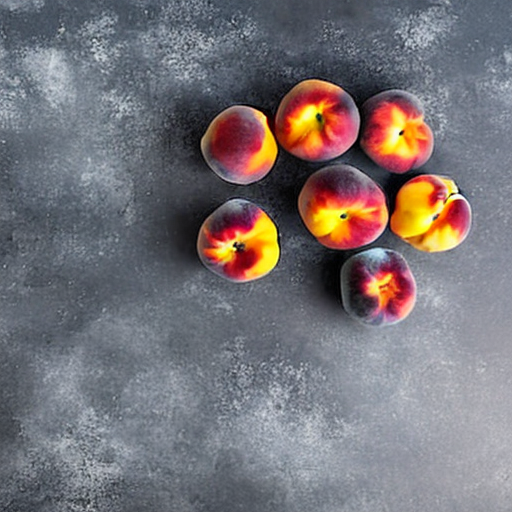
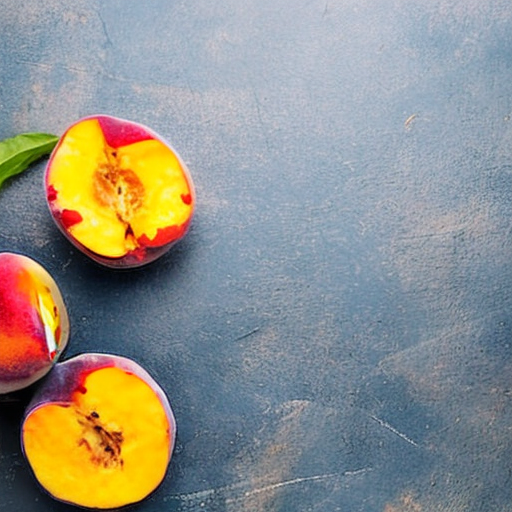
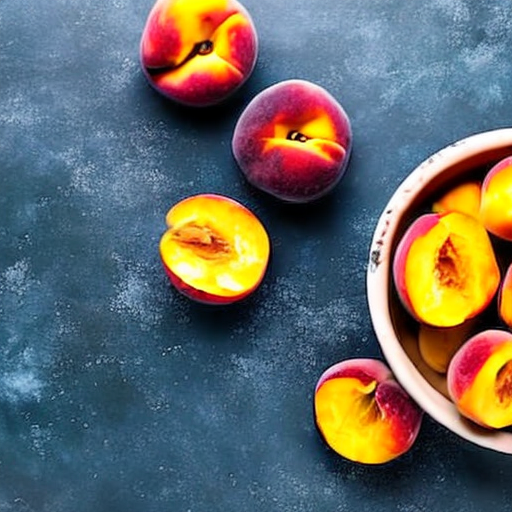
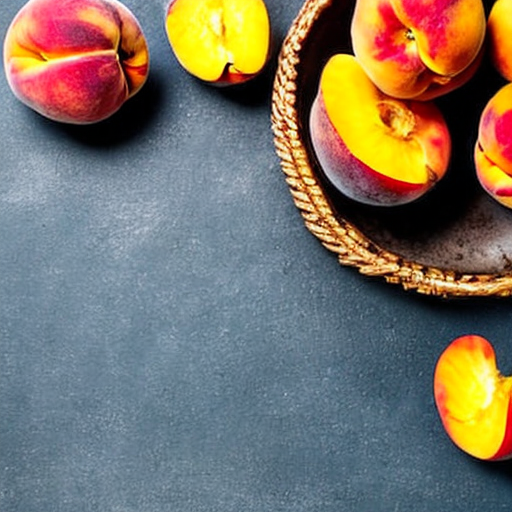

In [ ]:
#prompt = "a photo of whole Kiwifruits on the table. It has a  fuzzy, light brown skin. top view"
prompt = "a photo of whole peaches on the table. top view"

def gen_images(prompt, num_images=4):
  remove_safety = False
  #num_images = 4

  if remove_safety:
    negative_prompt = None
  else:
    negative_prompt = "nude, naked, sliced, halved, cut"

  images = pipe(
      prompt,
      height = image_length,
      width = image_length,
      num_inference_steps = 25,
      guidance_scale = 9,
      num_images_per_prompt = num_images,
      negative_prompt = negative_prompt,
      ).images

  return images

images = gen_images(prompt, num_images=4)    
media.show_images(images)

In [ ]:
import numpy as np

#prompt = "a photo of whole kiwis on the table. It has a  fuzzy, light brown skin. top view"
prompt = "a photo of whole peaches on the table. top view"

def gen_images(prompt, num_images=4):
  remove_safety = False
  #num_images = 4

  if remove_safety:
    negative_prompt = None
  else:
    #negative_prompt = "nude, naked, sliced, halved"       # for all other fruits
    negative_prompt = "nude, naked, sliced, halved, cut"  # for kiwi

  images = pipe(
      prompt,
      height = image_length,
      width = image_length,
      num_inference_steps = 25,
      guidance_scale = 9,
      num_images_per_prompt = num_images,
      negative_prompt = negative_prompt,
      ).images

  return images

path_to_save = "/content/sample_data/peach/"  

num_images = 4
total_num_images = 100

print(f'Number of batches: {int(np.ceil(total_num_images/num_images))}')
for idx in range(int(np.ceil(total_num_images/num_images))):
  print(f'idx: {idx}')  
  images = gen_images(prompt, num_images=4)    
  #media.show_images(images)

  for sub_indx, im in enumerate(images):
    im.save(path_to_save + 'peach_add_' + str(idx) + '_' + str(sub_indx) + '.png')


#images[0].save("output.jpg")

Number of batches: 25
idx: 0


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 1


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 2


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 3


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 4


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 5


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 6


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 7


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 8


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 9


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 10


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 11


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 12


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 13


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 14


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 15


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 16


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 17


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 18


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 19


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 20


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 21


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 22


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 23


  0%|          | 0/25 [00:00<?, ?it/s]

idx: 24


  0%|          | 0/25 [00:00<?, ?it/s]